In [1]:
import numpy as np
import json
import os
import sys
import re
import copy
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(1, "../src/utils/")
from agent import Environment
# from text2equation import resolve_equations
from Q_learning import QLearningTrainer
from itertools import product
import random
# from text2equation import resolve_equations
agent = Environment("rocket.json", check_model = False)
RL = QLearningTrainer(agent, num_episodes = 200, decay_type = "exponential", convergence_criterion = 0.01, decrease_prob_exp = 0.01)

# <span style="color:orange">Input file</span>

Before to start trainning we need to define our environment. In this example, the system is a rocket. It falls from a starting point and the goal is to reach a target with a minimum speed and maximize fuel.
Variable's names, their initial values and boundaries limit are defined into a JSON file (or can be given directly into a dictionary)

## <span style="color:orange">Variables</span>

Variables can be categorize into 3 classes:
* states_variables : variable used as coordinate to describe our system
* agent_variables : variable use as agent. Their values are changed for each iteration
* 3th category are other variables. They are not used to describe our environment but they can be usefull to monitor information or to compute intermediate value. There is no key for this kind of variable. Consider them as variables present into `initial_values` field and that are not `states_variables` and `agent_variables`

You can access to the name of state and agent variables, with the attibute `states_variables` and `agent_variables`.

## <span style="color:orange">Initial system</span>

## <span style="color:orange">Limit</span>

## <span style="color:orange">Agents's actions</span>

## <span style="color:orange">System's evolution</span>

## <span style="color:orange">Reward</span>


# <span style="color:orange">Lets see how system evolves</span>

Before to start training, a premilary work must be done on reward function. Indeed, we have 2 agents. Each one has an impact on rocket trajectory. 

Lets simulate a simple case. Our rocket start with no spped. The only force applied on it is G. The rocket falls down straight on the planetoid (angle is zero no needs to correct it) and without friction. We start booster engine when we are close to the ground. For that, we compute the new position after 3 * dt.

When futur position ordinate is bellow zero, we activate engine to compensate the fall speed and avoid the crash 

In [6]:
RL.reinitialize()
flag = "0"
actions ={"action_booster" : []} 
for i in range(40):    
    RL.env.step([flag,1]) 
    actions["action_booster"].append(flag)
    if RL.env.futur_pos_y[-1] <= 0:
        # RL.env.delete_last_states(end_index = -2)
        flag ="2"
# save result 
df_traj = pd.concat([pd.DataFrame(RL.env.all_states()), pd.DataFrame(actions)], axis = 1)

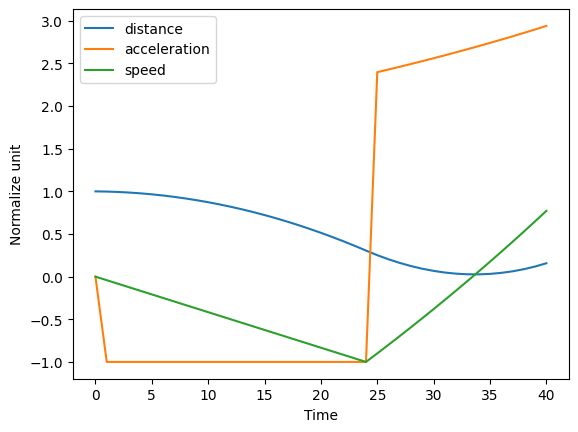

In [7]:
G = 1.62
plt.plot(df_traj[["pos_y"]] /df_traj[["pos_y"]].max(), label ="distance")
plt.plot(df_traj[["acceleration_y"]] /G, label ="acceleration")
plt.plot(df_traj[["speed_y"]] /df_traj[["speed_y"]].abs().max(), label ="speed")
plt.xlabel("Time")
plt.ylabel("Normalize unit")
plt.legend()
plt.show()

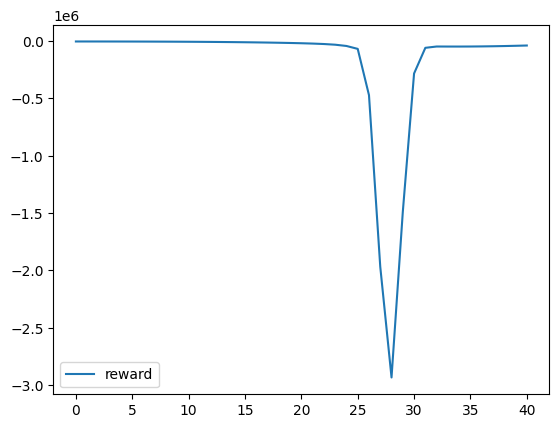

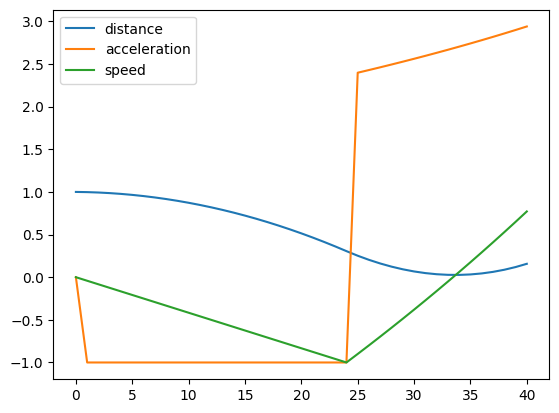

In [4]:
plt.plot(pd.DataFrame(RL.env.rewards)["booster"], label = "reward")
plt.legend()
plt.show()
plt.plot(df_traj[["pos_y"]] /df_traj[["pos_y"]].max(), label ="distance")
plt.plot(df_traj[["acceleration_y"]] /1.62, label ="acceleration")
plt.plot(df_traj[["speed_y"]] /df_traj[["speed_y"]].abs().max(), label ="speed")
plt.legend()
plt.show()

In [2]:
RL.q_learning()

Episode 1/200
exploration_prob : 1.000


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:202: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a futu

No action possible. Stop episode at 27th iterations
Save last state even is out of bound
Q table still growths
Loss : 3.2728275575974626e+41
end while loop iteration :  27
Episode 2/200
exploration_prob : 0.990


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 21th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.4691382985806405e+41
end while loop iteration :  21
Episode 3/200
exploration_prob : 0.980


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 30th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.3805759344063935e+40
end while loop iteration :  30
Episode 4/200
exploration_prob : 0.970


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 40th iterations
Save last state even is out of bound
Q table still growths
Loss : 6.348734800482926e+39
end while loop iteration :  40
Episode 5/200
exploration_prob : 0.961


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 23th iterations
Save last state even is out of bound
Q table still growths
Loss : 5.448847605935846e+46
end while loop iteration :  23
Episode 6/200
exploration_prob : 0.951


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 24th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.7963985459131578e+28
end while loop iteration :  24
Episode 7/200
exploration_prob : 0.942


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 24th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.1423324090776078e+40
end while loop iteration :  24
Episode 8/200
exploration_prob : 0.932


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 26th iterations
Save last state even is out of bound
Q table still growths
Loss : 6.118290512749515e+32
end while loop iteration :  26
Episode 9/200
exploration_prob : 0.923


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 23th iterations
Save last state even is out of bound
Q table still growths
Loss : 4.9735912570528774e+33
end while loop iteration :  23
Episode 10/200
exploration_prob : 0.914


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 22th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.790842153651867e+40
end while loop iteration :  22
Episode 11/200
exploration_prob : 0.905


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 25th iterations
Save last state even is out of bound
Q table still growths
Loss : 4.1130592108619568e+34
end while loop iteration :  25
Episode 12/200
exploration_prob : 0.896


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 22th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.2002994448732533e+43
end while loop iteration :  22
Episode 13/200
exploration_prob : 0.887


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 20th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.4623679333471477e+40
end while loop iteration :  20
Episode 14/200
exploration_prob : 0.878


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 24th iterations
Save last state even is out of bound
Q table still growths
Loss : 4.636895189983514e+30
end while loop iteration :  24
Episode 15/200
exploration_prob : 0.869


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 26th iterations
Save last state even is out of bound
Q table still growths
Loss : 6.80507060447862e+43
end while loop iteration :  26
Episode 16/200
exploration_prob : 0.861


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 29th iterations
Save last state even is out of bound
Q table still growths
Loss : 6.488661943801699e+40
end while loop iteration :  29
Episode 17/200
exploration_prob : 0.852


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 20th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.787621198940722e+45
end while loop iteration :  20
Episode 18/200
exploration_prob : 0.844


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 35th iterations
Save last state even is out of bound
Q table still growths
Loss : 3.2630040764007356e+31
end while loop iteration :  35
Episode 19/200
exploration_prob : 0.835


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 27th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.9167851400685636e+34
end while loop iteration :  27
Episode 20/200
exploration_prob : 0.827


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 30th iterations
Save last state even is out of bound
Q table still growths
Loss : 3.381338870940946e+42
end while loop iteration :  30
Episode 21/200
exploration_prob : 0.819


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 36th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.0779347839674913e+39
end while loop iteration :  36
Episode 22/200
exploration_prob : 0.811


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 37th iterations
Save last state even is out of bound
Q table still growths
Loss : 5.053276701583328e+34
end while loop iteration :  37
Episode 23/200
exploration_prob : 0.803


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 36th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.4647772119946443e+46
end while loop iteration :  36
Episode 24/200
exploration_prob : 0.795


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 21th iterations
Save last state even is out of bound
Q table still growths
Loss : 7.489454072587005e+37
end while loop iteration :  21
Episode 25/200
exploration_prob : 0.787


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 23th iterations
Save last state even is out of bound
Q table still growths
Loss : 7.889089694775477e+36
end while loop iteration :  23
Episode 26/200
exploration_prob : 0.779


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 31th iterations
Save last state even is out of bound
Q table still growths
Loss : 4.320832253664176e+30
end while loop iteration :  31
Episode 27/200
exploration_prob : 0.771


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 29th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.8362088455023132e+35
end while loop iteration :  29
Episode 28/200
exploration_prob : 0.763


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 29th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.0115356532351697e+43
end while loop iteration :  29
Episode 29/200
exploration_prob : 0.756


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 31th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.522889279470117e+41
end while loop iteration :  31
Episode 30/200
exploration_prob : 0.748


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 29th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.4411358002667215e+32
end while loop iteration :  29
Episode 31/200
exploration_prob : 0.741


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 25th iterations
Save last state even is out of bound
Q table still growths
Loss : 9.726418968973552e+36
end while loop iteration :  25
Episode 32/200
exploration_prob : 0.733


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 28th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.265315892539223e+39
end while loop iteration :  28
Episode 33/200
exploration_prob : 0.726


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 24th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.0605598036001054e+44
end while loop iteration :  24
Episode 34/200
exploration_prob : 0.719


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 32th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.5407196144763292e+36
end while loop iteration :  32
Episode 35/200
exploration_prob : 0.712


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 32th iterations
Save last state even is out of bound
Q table still growths
Loss : 4.111655446158089e+41
end while loop iteration :  32
Episode 36/200
exploration_prob : 0.705


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 34th iterations
Save last state even is out of bound
Q table still growths
Loss : 5.286337503866332e+38
end while loop iteration :  34
Episode 37/200
exploration_prob : 0.698


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 35th iterations
Save last state even is out of bound
Q table still growths
Loss : 6.177749858740793e+38
end while loop iteration :  35
Episode 38/200
exploration_prob : 0.691


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 31th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.069807323354957e+37
end while loop iteration :  31
Episode 39/200
exploration_prob : 0.684


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 25th iterations
Save last state even is out of bound
Q table still growths
Loss : 8.205163167451713e+38
end while loop iteration :  25
Episode 40/200
exploration_prob : 0.677


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 30th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.2280070197593762e+39
end while loop iteration :  30
Episode 41/200
exploration_prob : 0.670


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 25th iterations
Save last state even is out of bound
Q table still growths
Loss : 3.701837795945496e+39
end while loop iteration :  25
Episode 42/200
exploration_prob : 0.664


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 25th iterations
Save last state even is out of bound
Q table still growths
Loss : 3.7725933361671595e+30
end while loop iteration :  25
Episode 43/200
exploration_prob : 0.657


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 39th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.1651397127076072e+26
end while loop iteration :  39
Episode 44/200
exploration_prob : 0.651


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 24th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.4445056691847957e+37
end while loop iteration :  24
Episode 45/200
exploration_prob : 0.644


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 24th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.1928408969160565e+32
end while loop iteration :  24
Episode 46/200
exploration_prob : 0.638


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 29th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.2337125504685122e+38
end while loop iteration :  29
Episode 47/200
exploration_prob : 0.631


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 23th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.408026858336111e+42
end while loop iteration :  23
Episode 48/200
exploration_prob : 0.625


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 42th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.1344169849344281e+42
end while loop iteration :  42
Episode 49/200
exploration_prob : 0.619


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 20th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.774414761655741e+42
end while loop iteration :  20
Episode 50/200
exploration_prob : 0.613


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 25th iterations
Save last state even is out of bound
Q table still growths
Loss : 5.290181388975812e+36
end while loop iteration :  25
Episode 51/200
exploration_prob : 0.607


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 37th iterations
Save last state even is out of bound
Q table still growths
Loss : 4.656077345806706e+40
end while loop iteration :  37
Episode 52/200
exploration_prob : 0.600


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 30th iterations
Save last state even is out of bound
Q table still growths
Loss : 8.513956645818437e+31
end while loop iteration :  30
Episode 53/200
exploration_prob : 0.595


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 29th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.6944038084641938e+40
end while loop iteration :  29
Episode 54/200
exploration_prob : 0.589


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 23th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.3358284601311806e+47
end while loop iteration :  23
Episode 55/200
exploration_prob : 0.583


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 36th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.2518021074731295e+38
end while loop iteration :  36
Episode 56/200
exploration_prob : 0.577


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 29th iterations
Save last state even is out of bound
Q table still growths
Loss : 4.024163034822405e+41
end while loop iteration :  29
Episode 57/200
exploration_prob : 0.571


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 24th iterations
Save last state even is out of bound
Q table still growths
Loss : 4.9233993877442885e+36
end while loop iteration :  24
Episode 58/200
exploration_prob : 0.566


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 50th iterations
Save last state even is out of bound
Q table still growths
Loss : 7.266371869504779e+33
end while loop iteration :  50
Episode 59/200
exploration_prob : 0.560


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 43th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.3642669135394805e+35
end while loop iteration :  43
Episode 60/200
exploration_prob : 0.554


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 43th iterations
Save last state even is out of bound
Q table still growths
Loss : 6.742245927835208e+36
end while loop iteration :  43
Episode 61/200
exploration_prob : 0.549


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 40th iterations
Save last state even is out of bound
Q table still growths
Loss : 3.382089337477989e+30
end while loop iteration :  40
Episode 62/200
exploration_prob : 0.543


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 26th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.142736918967464e+42
end while loop iteration :  26
Episode 63/200
exploration_prob : 0.538


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 23th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.2894918778727645e+37
end while loop iteration :  23
Episode 64/200
exploration_prob : 0.533


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 31th iterations
Save last state even is out of bound
Q table still growths
Loss : 8.977200083682227e+49
end while loop iteration :  31
Episode 65/200
exploration_prob : 0.527


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 37th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.8863228461809482e+32
end while loop iteration :  37
Episode 66/200
exploration_prob : 0.522


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 29th iterations
Save last state even is out of bound
Q table still growths
Loss : 5.0708209175905e+28
end while loop iteration :  29
Episode 67/200
exploration_prob : 0.517


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 24th iterations
Save last state even is out of bound
Q table still growths
Loss : 6.939437052885855e+38
end while loop iteration :  24
Episode 68/200
exploration_prob : 0.512


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 30th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.5098034780135365e+40
end while loop iteration :  30
Episode 69/200
exploration_prob : 0.507


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 19th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.0546494771656778e+47
end while loop iteration :  19
Episode 70/200
exploration_prob : 0.502


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 32th iterations
Save last state even is out of bound
Q table still growths
Loss : 6.21362150077977e+37
end while loop iteration :  32
Episode 71/200
exploration_prob : 0.497


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 23th iterations
Save last state even is out of bound
Q table still growths
Loss : 3.1500442878699352e+41
end while loop iteration :  23
Episode 72/200
exploration_prob : 0.492


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 36th iterations
Save last state even is out of bound
Q table still growths
Loss : 3.0699273988832187e+37
end while loop iteration :  36
Episode 73/200
exploration_prob : 0.487


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 28th iterations
Save last state even is out of bound
Q table still growths
Loss : 4.309691043318368e+31
end while loop iteration :  28
Episode 74/200
exploration_prob : 0.482


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 50th iterations
Save last state even is out of bound
Q table still growths
Loss : 5.736665444742253e+40
end while loop iteration :  50
Episode 75/200
exploration_prob : 0.477


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 28th iterations
Save last state even is out of bound
Q table still growths
Loss : 4.487111514358993e+36
end while loop iteration :  28
Episode 76/200
exploration_prob : 0.472


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 25th iterations
Save last state even is out of bound
Q table still growths
Loss : 6.098372967650145e+33
end while loop iteration :  25
Episode 77/200
exploration_prob : 0.468


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 21th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.2810329356922271e+45
end while loop iteration :  21
Episode 78/200
exploration_prob : 0.463


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 21th iterations
Save last state even is out of bound
Q table still growths
Loss : 7.271767521151993e+38
end while loop iteration :  21
Episode 79/200
exploration_prob : 0.458


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 25th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.4852139749884567e+30
end while loop iteration :  25
Episode 80/200
exploration_prob : 0.454


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 35th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.0318204965762236e+36
end while loop iteration :  35
Episode 81/200
exploration_prob : 0.449


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 32th iterations
Save last state even is out of bound
Q table still growths
Loss : 8.75378984227908e+40
end while loop iteration :  32
Episode 82/200
exploration_prob : 0.445


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 23th iterations
Save last state even is out of bound
Q table still growths
Loss : 6.383424965755466e+37
end while loop iteration :  23
Episode 83/200
exploration_prob : 0.440


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 37th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.0355662588830772e+38
end while loop iteration :  37
Episode 84/200
exploration_prob : 0.436


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 38th iterations
Save last state even is out of bound
Q table still growths
Loss : 7.959672858860567e+43
end while loop iteration :  38
Episode 85/200
exploration_prob : 0.432


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 29th iterations
Save last state even is out of bound
Q table still growths
Loss : 3.5444409332980574e+31
end while loop iteration :  29
Episode 86/200
exploration_prob : 0.427


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 23th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.0521991328664777e+41
end while loop iteration :  23
Episode 87/200
exploration_prob : 0.423


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 28th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.8899224339281452e+51
end while loop iteration :  28
Episode 88/200
exploration_prob : 0.419


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 24th iterations
Save last state even is out of bound
Q table still growths
Loss : 4.477689731092023e+43
end while loop iteration :  24
Episode 89/200
exploration_prob : 0.415


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 23th iterations
Save last state even is out of bound
Q table still growths
Loss : 5.893531082291238e+42
end while loop iteration :  23
Episode 90/200
exploration_prob : 0.411


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 23th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.2134730614046644e+44
end while loop iteration :  23
Episode 91/200
exploration_prob : 0.407


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 29th iterations
Save last state even is out of bound
Q table still growths
Loss : 6.854459743065562e+39
end while loop iteration :  29
Episode 92/200
exploration_prob : 0.403


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 39th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.4340273830673508e+39
end while loop iteration :  39
Episode 93/200
exploration_prob : 0.399


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 28th iterations
Save last state even is out of bound
Q table still growths
Loss : 9.733617356406193e+38
end while loop iteration :  28
Episode 94/200
exploration_prob : 0.395


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 38th iterations
Save last state even is out of bound
Q table still growths
Loss : 9.413360159365593e+32
end while loop iteration :  38
Episode 95/200
exploration_prob : 0.391


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 29th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.3067575948292922e+32
end while loop iteration :  29
Episode 96/200
exploration_prob : 0.387


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 26th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.1630995976622074e+40
end while loop iteration :  26
Episode 97/200
exploration_prob : 0.383


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 30th iterations
Save last state even is out of bound
Q table still growths
Loss : 7.395263805412308e+40
end while loop iteration :  30
Episode 98/200
exploration_prob : 0.379


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 23th iterations
Save last state even is out of bound
Q table still growths
Loss : 3.537510402859404e+38
end while loop iteration :  23
Episode 99/200
exploration_prob : 0.375


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 31th iterations
Save last state even is out of bound
Q table still growths
Loss : 3.607474333427966e+40
end while loop iteration :  31
Episode 100/200
exploration_prob : 0.372


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 23th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.4403250240777822e+35
end while loop iteration :  23
Episode 101/200
exploration_prob : 0.368


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 36th iterations
Save last state even is out of bound
Q table still growths
Loss : 3.524556675572999e+36
end while loop iteration :  36
Episode 102/200
exploration_prob : 0.364


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 25th iterations
Save last state even is out of bound
Q table still growths
Loss : 5.06589064116876e+36
end while loop iteration :  25
Episode 103/200
exploration_prob : 0.361


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 36th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.0835741405627821e+39
end while loop iteration :  36
Episode 104/200
exploration_prob : 0.357


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 28th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.0495671275201247e+46
end while loop iteration :  28
Episode 105/200
exploration_prob : 0.353


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 21th iterations
Save last state even is out of bound
Q table still growths
Loss : 9.779870986861387e+42
end while loop iteration :  21
Episode 106/200
exploration_prob : 0.350


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 22th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.3648820777449484e+40
end while loop iteration :  22
Episode 107/200
exploration_prob : 0.346


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 46th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.730198367059173e+42
end while loop iteration :  46
Episode 108/200
exploration_prob : 0.343


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 27th iterations
Save last state even is out of bound
Q table still growths
Loss : 5.118006477632033e+54
end while loop iteration :  27
Episode 109/200
exploration_prob : 0.340


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 22th iterations
Save last state even is out of bound
Q table still growths
Loss : 3.8258793570107266e+46
end while loop iteration :  22
Episode 110/200
exploration_prob : 0.336


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 30th iterations
Save last state even is out of bound
Q table still growths
Loss : 6.160035445308965e+40
end while loop iteration :  30
Episode 111/200
exploration_prob : 0.333


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 42th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.4004822864135715e+33
end while loop iteration :  42
Episode 112/200
exploration_prob : 0.330


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 34th iterations
Save last state even is out of bound
Q table still growths
Loss : 5.0409459384226216e+33
end while loop iteration :  34
Episode 113/200
exploration_prob : 0.326


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 29th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.8157262900618326e+45
end while loop iteration :  29
Episode 114/200
exploration_prob : 0.323


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 26th iterations
Save last state even is out of bound
Q table still growths
Loss : 9.524894028250256e+37
end while loop iteration :  26
Episode 115/200
exploration_prob : 0.320


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 24th iterations
Save last state even is out of bound
Q table still growths
Loss : 5.482718342685677e+37
end while loop iteration :  24
Episode 116/200
exploration_prob : 0.317


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 23th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.0011176005557395e+45
end while loop iteration :  23
Episode 117/200
exploration_prob : 0.313


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 31th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.3121262882262458e+30
end while loop iteration :  31
Episode 118/200
exploration_prob : 0.310


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 33th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.0060330222569785e+44
end while loop iteration :  33
Episode 119/200
exploration_prob : 0.307


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 50th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.0005998376542215e+36
end while loop iteration :  50
Episode 120/200
exploration_prob : 0.304


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 30th iterations
Save last state even is out of bound
Q table still growths
Loss : 4.255027637996223e+33
end while loop iteration :  30
Episode 121/200
exploration_prob : 0.301


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 33th iterations
Save last state even is out of bound
Q table still growths
Loss : 9.28676677957288e+37
end while loop iteration :  33
Episode 122/200
exploration_prob : 0.298


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 30th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.7144324906579565e+47
end while loop iteration :  30
Episode 123/200
exploration_prob : 0.295


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 35th iterations
Save last state even is out of bound
Q table still growths
Loss : 4.756224836687752e+38
end while loop iteration :  35
Episode 124/200
exploration_prob : 0.292


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 42th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.2242496522452432e+38
end while loop iteration :  42
Episode 125/200
exploration_prob : 0.289


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 26th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.0329476997746745e+37
end while loop iteration :  26
Episode 126/200
exploration_prob : 0.287


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 22th iterations
Save last state even is out of bound
Q table still growths
Loss : 6.15865757942096e+37
end while loop iteration :  22
Episode 127/200
exploration_prob : 0.284


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 23th iterations
Save last state even is out of bound
Q table still growths
Loss : 9.563331565158117e+36
end while loop iteration :  23
Episode 128/200
exploration_prob : 0.281


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 36th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.797514840420524e+40
end while loop iteration :  36
Episode 129/200
exploration_prob : 0.278


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 27th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.0295193152159706e+41
end while loop iteration :  27
Episode 130/200
exploration_prob : 0.275


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 28th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.0418517818995956e+31
end while loop iteration :  28
Episode 131/200
exploration_prob : 0.273


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 33th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.280858631022493e+39
end while loop iteration :  33
Episode 132/200
exploration_prob : 0.270


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 41th iterations
Save last state even is out of bound
Q table still growths
Loss : 5.104911236997467e+40
end while loop iteration :  41
Episode 133/200
exploration_prob : 0.267


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 31th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.170094052023119e+31
end while loop iteration :  31
Episode 134/200
exploration_prob : 0.264


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 27th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.7873102818238058e+45
end while loop iteration :  27
Episode 135/200
exploration_prob : 0.262


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 29th iterations
Save last state even is out of bound
Q table still growths
Loss : 4.650276351384278e+30
end while loop iteration :  29
Episode 136/200
exploration_prob : 0.259


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 29th iterations
Save last state even is out of bound
Q table still growths
Loss : 4.283554214724333e+47
end while loop iteration :  29
Episode 137/200
exploration_prob : 0.257


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 23th iterations
Save last state even is out of bound
Q table still growths
Loss : 7.596248190074437e+37
end while loop iteration :  23
Episode 138/200
exploration_prob : 0.254


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 21th iterations
Save last state even is out of bound
Q table still growths
Loss : 6.030935011463367e+42
end while loop iteration :  21
Episode 139/200
exploration_prob : 0.252


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 36th iterations
Save last state even is out of bound
Q table still growths
Loss : 3.087529687657206e+45
end while loop iteration :  36
Episode 140/200
exploration_prob : 0.249


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 37th iterations
Save last state even is out of bound
Q table still growths
Loss : 6.551237415632908e+38
end while loop iteration :  37
Episode 141/200
exploration_prob : 0.247


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 24th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.0275897103463096e+32
end while loop iteration :  24
Episode 142/200
exploration_prob : 0.244


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 33th iterations
Save last state even is out of bound
Q table still growths
Loss : 7.381045627197025e+45
end while loop iteration :  33
Episode 143/200
exploration_prob : 0.242


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 29th iterations
Save last state even is out of bound
Q table still growths
Loss : 5.6041312717513035e+28
end while loop iteration :  29
Episode 144/200
exploration_prob : 0.239


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 26th iterations
Save last state even is out of bound
Q table still growths
Loss : 6.804198460324309e+29
end while loop iteration :  26
Episode 145/200
exploration_prob : 0.237


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 40th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.5062381355225178e+41
end while loop iteration :  40
Episode 146/200
exploration_prob : 0.235


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 32th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.806846197333007e+34
end while loop iteration :  32
Episode 147/200
exploration_prob : 0.232


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 31th iterations
Save last state even is out of bound
Q table still growths
Loss : 5.274185743533205e+33
end while loop iteration :  31
Episode 148/200
exploration_prob : 0.230


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 29th iterations
Save last state even is out of bound
Q table still growths
Loss : 3.9838149965908258e+37
end while loop iteration :  29
Episode 149/200
exploration_prob : 0.228


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 20th iterations
Save last state even is out of bound
Q table still growths
Loss : 8.104926462082501e+40
end while loop iteration :  20
Episode 150/200
exploration_prob : 0.225


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 35th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.3105194800635886e+33
end while loop iteration :  35
Episode 151/200
exploration_prob : 0.223


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 28th iterations
Save last state even is out of bound
Q table still growths
Loss : 3.4012583564531435e+35
end while loop iteration :  28
Episode 152/200
exploration_prob : 0.221


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 27th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.0185801806382214e+35
end while loop iteration :  27
Episode 153/200
exploration_prob : 0.219


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 22th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.4414173360130133e+45
end while loop iteration :  22
Episode 154/200
exploration_prob : 0.217


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 27th iterations
Save last state even is out of bound
Q table still growths
Loss : 4.588866579218778e+38
end while loop iteration :  27
Episode 155/200
exploration_prob : 0.214


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 34th iterations
Save last state even is out of bound
Q table still growths
Loss : 4.010854855745449e+34
end while loop iteration :  34
Episode 156/200
exploration_prob : 0.212


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 37th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.1474954800455748e+33
end while loop iteration :  37
Episode 157/200
exploration_prob : 0.210


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 40th iterations
Save last state even is out of bound
Q table still growths
Loss : 4.55038763095601e+42
end while loop iteration :  40
Episode 158/200
exploration_prob : 0.208


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 30th iterations
Save last state even is out of bound
Q table still growths
Loss : 3.8567759894921984e+33
end while loop iteration :  30
Episode 159/200
exploration_prob : 0.206


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 28th iterations
Save last state even is out of bound
Q table still growths
Loss : 6.85983615684911e+34
end while loop iteration :  28
Episode 160/200
exploration_prob : 0.204


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 41th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.498463963750844e+36
end while loop iteration :  41
Episode 161/200
exploration_prob : 0.202


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 27th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.0738897176389932e+41
end while loop iteration :  27
Episode 162/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 26th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.0803477661538585e+30
end while loop iteration :  26
Episode 163/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 30th iterations
Save last state even is out of bound
Q table still growths
Loss : 7.378565107414822e+36
end while loop iteration :  30
Episode 164/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 25th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.2609187261154923e+37
end while loop iteration :  25
Episode 165/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 30th iterations
Save last state even is out of bound
Q table still growths
Loss : 6.064906756773079e+36
end while loop iteration :  30
Episode 166/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 35th iterations
Save last state even is out of bound
Q table still growths
Loss : 3.324560184326413e+25
end while loop iteration :  35
Episode 167/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 29th iterations
Save last state even is out of bound
Q table still growths
Loss : 6.419777344127443e+35
end while loop iteration :  29
Episode 168/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 26th iterations
Save last state even is out of bound
Q table still growths
Loss : 6.328082052174092e+42
end while loop iteration :  26
Episode 169/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 30th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.3526490607954027e+33
end while loop iteration :  30
Episode 170/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 36th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.2918813715818555e+39
end while loop iteration :  36
Episode 171/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 26th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.513107944195606e+37
end while loop iteration :  26
Episode 172/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 21th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.024036025833898e+47
end while loop iteration :  21
Episode 173/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 36th iterations
Save last state even is out of bound
Q table still growths
Loss : 6.358547735446955e+32
end while loop iteration :  36
Episode 174/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 42th iterations
Save last state even is out of bound
Q table still growths
Loss : 3.409118019605297e+35
end while loop iteration :  42
Episode 175/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 23th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.5000535789382997e+36
end while loop iteration :  23
Episode 176/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 27th iterations
Save last state even is out of bound
Q table still growths
Loss : 7.84638380416055e+39
end while loop iteration :  27
Episode 177/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 44th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.238273416901401e+41
end while loop iteration :  44
Episode 178/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 30th iterations
Save last state even is out of bound
Q table still growths
Loss : 3.4922681352090064e+46
end while loop iteration :  30
Episode 179/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 34th iterations
Save last state even is out of bound
Q table still growths
Loss : 7.34672487058412e+35
end while loop iteration :  34
Episode 180/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 26th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.4365826440528575e+34
end while loop iteration :  26
Episode 181/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 24th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.2182657454060879e+36
end while loop iteration :  24
Episode 182/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 30th iterations
Save last state even is out of bound
Q table still growths
Loss : 8.43271439151487e+39
end while loop iteration :  30
Episode 183/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 27th iterations
Save last state even is out of bound
Q table still growths
Loss : 3.9139712106189505e+38
end while loop iteration :  27
Episode 184/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 33th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.42371288229197e+38
end while loop iteration :  33
Episode 185/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 31th iterations
Save last state even is out of bound
Q table still growths
Loss : 4.1897014034725876e+40
end while loop iteration :  31
Episode 186/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 55th iterations
Save last state even is out of bound
Q table still growths
Loss : 8.216326878189175e+51
end while loop iteration :  55
Episode 187/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 27th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.9916214990644963e+41
end while loop iteration :  27
Episode 188/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 38th iterations
Save last state even is out of bound
Q table still growths
Loss : 9.644229435886966e+41
end while loop iteration :  38
Episode 189/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 29th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.5204788992392182e+27
end while loop iteration :  29
Episode 190/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 33th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.887246500774358e+33
end while loop iteration :  33
Episode 191/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 34th iterations
Save last state even is out of bound
Q table still growths
Loss : 6.50388545647873e+38
end while loop iteration :  34
Episode 192/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 28th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.1842177219683643e+37
end while loop iteration :  28
Episode 193/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 22th iterations
Save last state even is out of bound
Q table still growths
Loss : 2.75411546840218e+38
end while loop iteration :  22
Episode 194/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 33th iterations
Save last state even is out of bound
Q table still growths
Loss : 9.958034126184105e+34
end while loop iteration :  33
Episode 195/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 25th iterations
Save last state even is out of bound
Q table still growths
Loss : 4.372684383503089e+34
end while loop iteration :  25
Episode 196/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 32th iterations
Save last state even is out of bound
Q table still growths
Loss : 3.3261646566002695e+32
end while loop iteration :  32
Episode 197/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 29th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.4689184338089307e+43
end while loop iteration :  29
Episode 198/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 25th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.1473424986021763e+38
end while loop iteration :  25
Episode 199/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 24th iterations
Save last state even is out of bound
Q table still growths
Loss : 1.115635410462894e+36
end while loop iteration :  24
Episode 200/200
exploration_prob : 0.200


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will chan

No action possible. Stop episode at 29th iterations
Save last state even is out of bound
Q table still growths
Loss : 6.664318766504182e+30
end while loop iteration :  29


d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)
d:\projets_git\RL_engine\notebook\../src/utils\Q_learning.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pd.DataFrame(index=[str(self.env.state_for_q_table())], columns=col).fillna(0)


In [ ]:
RL.env.json["states_variables"]

['pos_x',
 'pos_y',
 'acceleration_x',
 'acceleration_y',
 'speed_x',
 'speed_y',
 'm_fuel',
 'angle']

In [ ]:
QTABLE = copy.deepcopy(RL.q_table)
agent = Environment("rocket.json")
state = agent.state_for_q_table()
done = False
cpt = 0
limit = 20
replace_zero = True
action = [QTABLE.loc[ [str(state)], [key] ].to_numpy().argmax() for key in agent.action_space.keys()]



KeyError: "['booster'] not in index"

In [ ]:
action

In [ ]:
QTABLE = copy.deepcopy(RL.q_table)
agent.reset()
state = agent.state_for_q_table()
done = False
cpt = 0
limit = 20
replace_zero = True
if replace_zero:
    q_table = QTABLE.replace(0, np.nan)
else:
    q_table = QTABLE.copy()
while not done:
    action = [QTABLE.loc[ [str(state)], [key] ].to_numpy().argmax() for key in agent.action_space.keys()]
    if not isinstance(action, list):
        action = [action]
    # print("target variable ({0}): {1:.2f}".format(self.env.target_variable, self.env.frame.last_state()[self.env.target_variable][0]))
    # print("action :", action[0])
    _, _, _, _, _ = agent.step(action)
    state = agent.state_for_q_table()
    cpt += 1
    if cpt == limit:
        done = True


In [ ]:
RL.env.futur_pos_y

In [ ]:
RL.env.pos_y

In [ ]:
RL.env.speed_y

In [ ]:
import matplotlib.animation
import matplotlib.pyplot as plt
from itertools import count
import random

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  

fig, ax = plt.subplots()
x_value = []
y_value = []
index = count();
def animate(t):
    x_value.append(next(index))
    y_value.append(random.randint(0,10))
    ax.cla()
    ax.plot(x_value,y_value)
    ax.set_xlim(0,10)

matplotlib.animation.FuncAnimation(fig, animate, frames=10, interval = 500)

In [ ]:
RL.q_table_for_all_episodes[0]

In [ ]:
RL.q_table

In [ ]:
actions

In [ ]:
RL.env.json["equations_variables"]

In [ ]:
RL.env.json["initial_values"]

# modélisation de la chute libre de la rocket

In [ ]:
#reset value to initial state
RL.reinitialize()
while RL.env.last_state()["position_y"][0] > 5:
    RL.env.step(["0"], ["booster"])
    RL.env.last_state()["position_y"]
plt.plot(RL.env.all_states()["position_y"])

# modélisation de la chute libre de la rocket avec booster

In [ ]:
RL.reinitialize()
RL.env.last_state()["vitesse_y"][0]

In [ ]:
RL.reinitialize()
while RL.env.last_state()["vitesse_y"][0] < 5:
    RL.env.step(["1"], ["booster"])
    RL.env.last_state()["position_y"]

# modélisation d'une métric quadratique

In [ ]:
plt.plot(RL.env.all_states()["position_y"]/500)
plt.ylabel("Hateur")
plt.xlabel("Time")
plt.title("Position Y")
plt.show()
plt.plot(RL.env.all_states()["vitesse_y"])
plt.ylabel("Vitesse")
plt.xlabel("Time")
plt.title("Vitesse Y")
plt.show()

In [ ]:
plt.plot(np.square(RL.env.all_states()["vitesse_y"] - 5), RL.env.all_states()["position_y"] -10)

In [ ]:
plt.plot(np.square(RL.env.all_states()["vitesse_y"] - 5))


In [ ]:
RL.q_learning()

In [ ]:
RL.q_table

In [ ]:
RL.env.select_states(5, 10)

In [ ]:
RL.env.last_state()

In [ ]:
Environment({'initial_values': {'position_x': [400.0],
  'position_y': [950.0],
  'vitesse_x': [20.0],
  'vitesse_y': [-30.0],
  'angle': [0.3],
  'booster': [0.0]},
 '_limit': ['min', 'max', 'n_bins'],
 'limit': {'position_x': [0.0, 800, 100],
  'position_y': [0.0, 1000.0, 200],
  'vitesse_x': [-50.0, 50.0, 20],
  'vitesse_y': [-50.0, 50.0, 20],
  'angle': [-0.8, 0.8, 17],
  'booster': [0.0, 1.0, 2]},
 'n_action': {'angle': {'0': -0.1, '1': 0.0, '2': 0.1},
  'booster': {'0': 0.0, '1': 1.0}},
 '_action_to_take': 'How action change trigger_variable',
 'action_to_take': {'angle': {'$angle$': '$angle$ + $action$'},
  'booster': {'$booster$': '$action$'}},
 'states_variables': ['position_x',
  'position_y',
  'vitesse_x',
  'vitesse_y',
  'angle'],
 'trigger_variables': ['angle', 'booster'],
 'equations_variables': {'$time_step$': '0.1',
  '$g$': '9.81',
  '$acceleration_x$': '$g$ * cos($angle$)',
  '$acceleration_y$': '$g$ * sin($angle$)',
  '$vitesse_x$': '$vitesse_x$ + $booster$ * 5.0 * cos($angle$)',
  '$vitesse_y$': '$vitesse_y$ + $booster$ * 5.0 * sin($angle$)',
  '$position_x$': '$position_x$ + $vitesse_x$ * $time_step$ + 0.5 * $acceleration_x$ * $time_step$^2',
  '$position_y$': '$position_y$ + $vitesse_y$ * $time_step$ + 0.5 * $acceleration_y$ * $time_step$^2'},
 'equations_rewards': {'$angle$': '-($angle$ * 10)^2 - abs($vitesse_x$) -1 * abs($position_x$ - 200)/10',
  '$booster$': '-($position_y$ - 5)^2 - abs($vitesse_y)$'}})

In [ ]:
features_values = {'x': np.array([4.0]),
 'a': np.array([-1.0]),
 'c': np.array([6])}

list_equations = {'$z$' : '$a$ * $x$^2 + $x$ + $c$'}

result = resolve_equations(features_values, list_equations)
result

In [ ]:
result.keys()

In [ ]:
features_values =agent.all_states()
list_equations = agent.json['equations_variables']
delimeter = "$"
solved_values = {}
for term, equation in list_equations.items():
    # convert string to SymPy expressions
    expr = sympify(equation.replace(delimeter, ''))
    # flag "subs": take a dictionary of Sylmbol: point pairs.
    # check we get goot format
    if all([isinstance(value, np.ndarray) for key, value in features_values.items()]):
        solved_values[term.replace(delimeter, '')] = np.array([float(
                sympify(expr).evalf(
                    subs={
                        key: value.item() for key, value in features_values.items()
                        }
                )
            )])
    elif all([isinstance(value, list) for key, value in features_values.items()]):
        solved_values[term.replace(delimeter, '')] = np.array([float(
                sympify(expr).evalf(
                    subs={
                        key: np.array(value).item() for key, value in features_values.items()
                        }
                )
            )])
    else:
        solved_values[term.replace(delimeter, '')] = np.array([float(
                sympify(expr).evalf(
                    subs={
                        key: value for key, value in features_values.items()
                        }
                )
            )])
    features_values[term.replace('$', '')] = np.array(
        [solved_values[term.replace('$', '')]]
        ).flatten()

In [ ]:
{
                        key: np.array(value).item() for key, value in features_values.items()
                        }

In [ ]:
RL = QLearningTrainer(agent)

In [ ]:
RL.q_table = RL.global_q_tables()
RL.q_table_old = RL.global_q_tables()
probas = RL.give_epsilon()
for episode in range(RL.num_episodes):
    print("Episode {0}/{1}".format(episode+1, RL.num_episodes))
    print("exploration_prob : {0:.3f}".format(probas[episode]))
    proba = probas[episode]
    #current_iter = self.training_q_learning(proba[episode])
    ########################################################
    RL.env.reset()
    states, done, current_iter, iter_out_of_bound = RL.reset_envrionement_multi_agent()
    while not any(done):
        # Choose actions for each agent based on the global policy
        # proba = np.max([self.min_prob, self.max_prob])
        actions = RL.call_choose_action(states, proba)
        # compute new states according to agents's action
        next_env, rewards, done, problem, info = RL.env.step(actions, RL.env.trigger_variables)
        if any(problem):
        # boundaries limit. Attempt to correct it
            # print("{0}th: boundaries limit. Attempt to correct it".format(current_iter))
            # print(next_env["U1"].env.last_state())
            next_env, rewards, done, problem, info, actions = RL.check_bound(problem,
                                                                    next_env,
                                                                    RL.env.action_space,
                                                                    rewards,
                                                                    done,
                                                                    info,
                                                                    actions)
            if any(done):
                # still out of bound stop episode
                # print("stop episode ! System is out of bound. Attempt to correct it, failed")
                # delete last element only if we get one trigger variable
                if len(RL.env.trigger_variables) == 1:
                    RL.env.delete_last_state()
                continue
        # Update Q-values bsssased on the Q-learning update rule.
        #   env.action_space.keys() -> dict_keys(['X', 'B', 'D'])
        #   actions -> [0, 1, 1]
        for trigger_variable, action in zip(RL.env.action_space.keys() , actions):
            new_row = RL.global_q_tables(next_env[trigger_variable])
            # check if next states is present in dataFrame
            if not new_row.index.to_list()[0] in RL.q_table.index.to_list():
                RL.q_table = pd.concat([RL.q_table, new_row])
            RL.update_q_values(trigger_variable,
                str(states[trigger_variable]),
                str(next_env[trigger_variable].state_for_q_table()),
                str(action),
                sum(rewards[trigger_variable].values()))
        # if we have more than 1 trigger variable
        # next state is choose as state with higher score
        if len(RL.env.trigger_variables) > 1:
            indice = np.where(
                [
                    sum(values.values()) for key, values in rewards.items()
                ] == np.max([
                    sum(values.values()) for key, values in rewards.items()
                ]))[0][0]
            RL.env = next_env[list(next_env.keys())[indice]]
            #  states = {list(next_env.keys())[indice] : self.env.state_for_q_table()}
            states = {key : RL.env.state_for_q_table() for key in next_env.keys()}
        elif len(RL.env.trigger_variables) == 1:
            RL.env = next_env[list(next_env.keys())[0]]
            states = {RL.env.trigger_variables[0] : next_env[list(next_env.keys())[0]].state_for_q_table()}
        else:
            print("Fatal error no keys present")
            sys.exit
        done = [RL.control_loop(current_iter)]
        current_iter  += 1
        RL.q_table_old = RL.q_table.copy()    
    ########################################################
    RL.states_for_all_episodes.append(pd.DataFrame(RL.env.all_states()))
    RL.q_table_for_all_episodes.append(RL.q_table.copy().replace(0, np.nan))
    # self.all_episodes.append(self.q_table.copy())
    ###############################################
    # self.max_prob -= self.decrease_prob_exp
    print("end while loop iteration : ", current_iter)
    RL.monitor_iter.append(current_iter)
    # check if we can stop training early
    # look last 6 episodes and check
    if len(RL.monitor_iter) > 6:
        tmp = np.sum(np.array(RL.monitor_iter[-6:-1]) == np.array(RL.monitor_iter[-5:]))
        if tmp == 5 and current_iter < RL.run_limit -1:
            print("Look like nothing to learn anymore, stop training")
            break
#             return q_table, self.monitor_iter
#replace 0 by nan
RL.q_table.replace(0, np.nan)

In [ ]:
np.linspace(-0.8, 8.0, num=17)

In [ ]:
RL.env.discretized_observation(dico = True)

In [ ]:
# Fonction pour mettre à jour les paramètres de la fusée
def mettre_a_jour_fusee(vitesse, position, angle_inclinaison, boosters_actifs, temps):
    acceleration_x = gravite * np.cos(angle_inclinaison)  # composante horizontale de l'accélération
    acceleration_y = gravite * np.sin(angle_inclinaison)  # composante verticale de l'accélération

    vitesse_x = vitesse[0] + boosters_actifs * 5.0 * np.cos(angle_inclinaison)  # vitesse horizontale avec les boosters
    vitesse_y = vitesse[1] + boosters_actifs * 5.0 * np.sin(angle_inclinaison)  # vitesse verticale avec les boosters

    # Mettre à jour les composantes de la vitesse
    vitesse_x += acceleration_x * temps
    vitesse_y -= acceleration_y * temps  # notez le signe négatif ici en raison de la direction positive vers le haut

    # Mettre à jour les composantes de la position
    position_x = position[0] + vitesse_x * temps + 0.5 * acceleration_x * temps**2
    position_y = position[1] + vitesse_y * temps + 0.5 * acceleration_y * temps**2

    # Variation aléatoire de l'angle des boosters (par exemple, entre -0.1 et 0.1 radians)
    angle_boosters = np.random.uniform(-0.1, 0.1)

    # Mettre à jour l'angle d'inclinaison
    angle_inclinaison += angle_boosters

    return (position_x, position_y), (vitesse_x, vitesse_y), angle_inclinaison, angle_boosters

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Paramètres initiaux
gravite = 9.81  # accélération due à la gravité sur Terre (m/s^2)
temps_de_vol = 40  # temps de vol de la fusée (s)
pas_de_temps = 0.1  # intervalle de temps entre les calculs (s)

# Conditions initiales
vitesse_initiale_x = 0.0  # m/s, la fusée démarre du repos
vitesse_initiale_y = -20.0  # m/s, la fusée démarre du repos
position_initiale_x = 0.0  # m, la fusée démarre du sol
position_initiale_y = 900
angle_inclinaison_initiale = 0.0  # angle d'inclinaison initial en radians



# Initialisation des listes pour stocker les données
temps = np.arange(0, temps_de_vol, pas_de_temps)
positions = []
vitesses = []
angles_inclinaison = []

# Conditions initiales
position = (position_initiale_x, 0.0)
vitesse = (vitesse_initiale_x, vitesse_initiale_y)
angle_inclinaison = angle_inclinaison_initiale

# Simulation du mouvement de la fusée
for t in temps:
    boosters_actifs = 1 if t < temps_de_vol / 2 else 0  # Allume les boosters pendant la première moitié du temps de vol
    position, vitesse, angle_inclinaison, _ = mettre_a_jour_fusee(
        vitesse, position, angle_inclinaison, boosters_actifs, pas_de_temps
    )

    positions.append(position)
    vitesses.append(vitesse)
    angles_inclinaison.append(angle_inclinaison)

# Tracé de la trajectoire
positions = np.array(positions)
plt.plot(temps, positions[:, 0], label='Position horizontale')
plt.plot(temps, positions[:, 1], label='Position verticale')
plt.title("Trajectoire d'une fusée avec boosters")
plt.xlabel("Temps (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.grid(True)
plt.show()

# Tracé de la vitesse et de l'angle d'inclinaison
vitesses = np.array(vitesses)
plt.plot(temps, vitesses[:, 0], label='Vitesse horizontale')
plt.plot(temps, vitesses[:, 1], label='Vitesse verticale')
plt.plot(temps, np.degrees(angles_inclinaison), label="Angle d'inclinaison (degrés)")
plt.title("Vitesse et angle d'inclinaison de la fusée")
plt.xlabel("Temps (s)")
plt.ylabel("Vitesse (m/s) / Angle (degrés)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
RL = QLearningTrainer(agent)

In [ ]:
RL.q_learning()

In [ ]:
RL.q_table